In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time

from scipy.sparse import csr_matrix, dok_matrix
from scipy.sparse.linalg import svds

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, max_error, ConfusionMatrixDisplay, confusion_matrix, matthews_corrcoef

# Using PCA with the *train.csv* dataset

In [11]:
df = pd.read_csv("train.csv")
df.shape

(21263, 82)

In [12]:
df.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

In [13]:
X = df.drop(columns=["critical_temp"])
y = df.critical_temp

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

## Objective 1 - Dimensionality Reduction

In [15]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [16]:
pca = PCA(n_components=0.9, svd_solver="full").fit(X_train)
pca_scaled = PCA(n_components=0.9, svd_solver="full").fit(X_train_scaled)

In [17]:
len(pca.explained_variance_), len(pca_scaled.explained_variance_)

(2, 12)

- If the data is scaled, the number of components to represent 90% of the data is -----> **12**
- If the data is not scaled, the number of components to represent 90% of the data is --> **2**

In [18]:
X_train_reduced = pca.transform(X_train)
X_train_scaled_reduced = pca_scaled.transform(X_train_scaled)

In [25]:
def plot(x, y, c, ax, xlabel="", ylabel="", title=""):
    ax.scatter(x,y,c=c)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

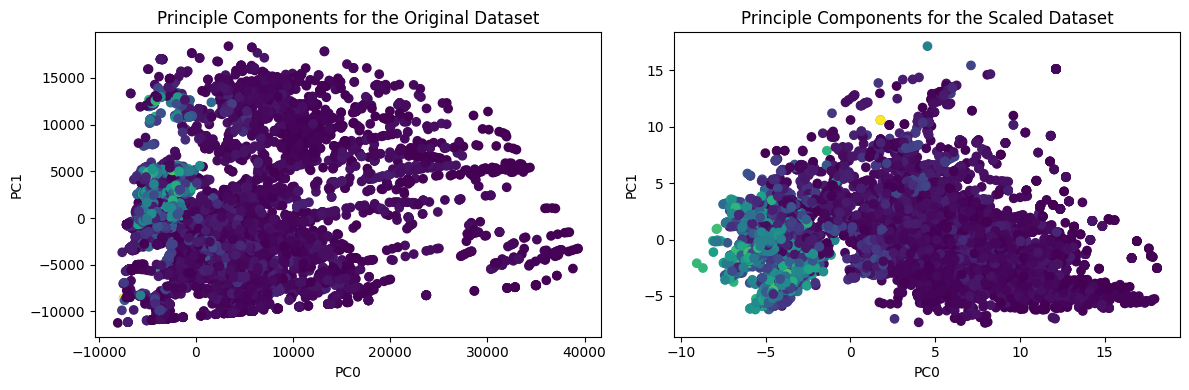

In [20]:
f, ax = plt.subplots(1,2, figsize=(12,4))

plot(X_train_reduced[:,0], X_train_reduced[:, 1], y_train, ax[0], "PC0", "PC1", "Principle Components for the Original Dataset")
plot(X_train_scaled_reduced[:,0], X_train_scaled_reduced[:, 1], y_train, ax[1], "PC0", "PC1", "Principle Components for the Scaled Dataset")
f.tight_layout()

In [24]:
y_train_class

array([0, 0, 2, ..., 2, 2, 0])

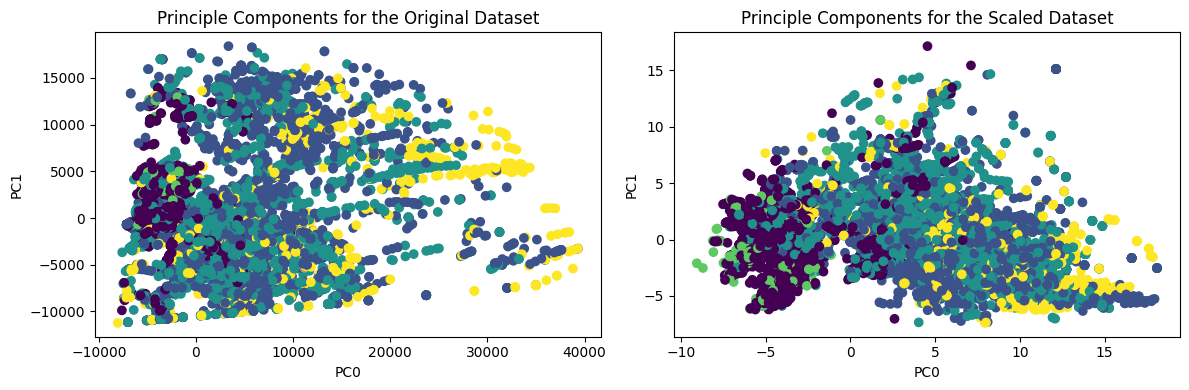

In [28]:
f, ax = plt.subplots(1,2, figsize=(12,4))

plot(X_train_reduced[:,0], X_train_reduced[:, 1], y_train_class, ax[0], "PC0", "PC1", "Principle Components for the Original Dataset")
plot(X_train_scaled_reduced[:,0], X_train_scaled_reduced[:, 1], y_train_class, ax[1], "PC0", "PC1", "Principle Components for the Scaled Dataset")
f.tight_layout()

We can observe that, even with more components for the 90% explainability, the data has a more clear separation when the data is scaled

## Objective 2 - Create a Regression and Classification model

### 2.1. Make a regression model

In [26]:
def evaluate(y_test, preds):
    print("RMSE =", mean_squared_error(y_test, preds, squared=False))
    print("Max. Error =", max_error(y_test, preds))
    
    plt.scatter(preds, y_test)
    plt.xlabel("Predictions")
    plt.ylabel("True Value")
    
    plt.plot(
        [ 0, 140], [0,140], "r"
    )

#### Using Full DataSet

Decision Tree seems to be a wise choice, since the data is decorrelated with PCA

In [14]:
dtr = DecisionTreeRegressor().fit(X_train, y_train)
dtr_scaled = DecisionTreeRegressor().fit(X_train_scaled, y_train)

In [15]:
preds = dtr.predict(X_test)
preds_scaled = dtr_scaled.predict(scaler.transform(X_test))

RMSE = 11.445087681907683
Max. Error = 105.5


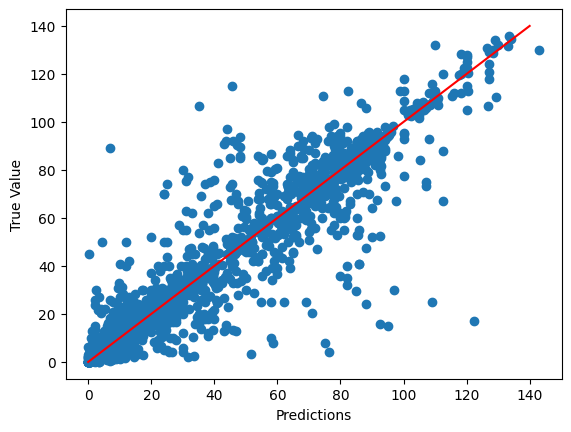

In [16]:
evaluate(y_test, preds)

RMSE = 11.730655443198012
Max. Error = 105.5


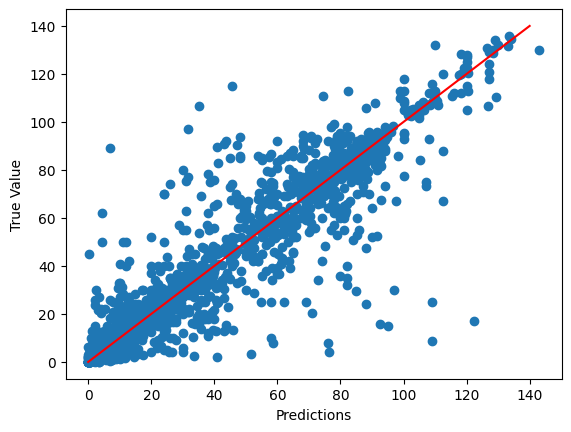

In [17]:
evaluate(y_test, preds_scaled)

#### Using Projected DataSet


In [18]:
dtr = Pipeline([
    ("reducter", PCA(n_components=0.9, svd_solver="full")),
    ("predictor", DecisionTreeRegressor())
]).fit(X_train, y_train)
dtr_scaled = Pipeline([
    ("reducter", PCA(n_components=0.9, svd_solver="full")),
    ("predictor", DecisionTreeRegressor())
]).fit(X_train_scaled, y_train)

In [19]:
preds = dtr.predict(X_test)
preds_scaled = dtr_scaled.predict(scaler.transform(X_test))

RMSE = 12.792919790354139
Max. Error = 108.0


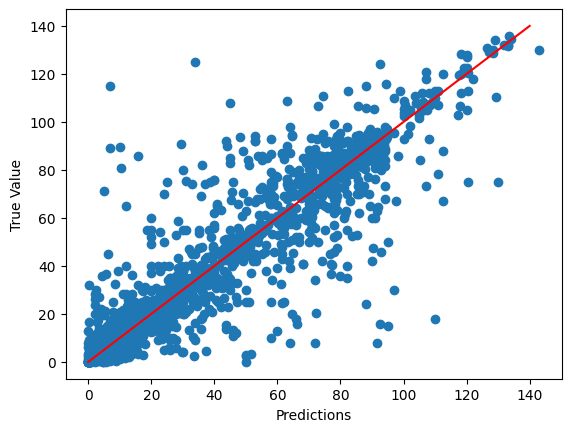

In [20]:
evaluate(y_test, preds)

RMSE = 12.788445467564795
Max. Error = 97.48666666666666


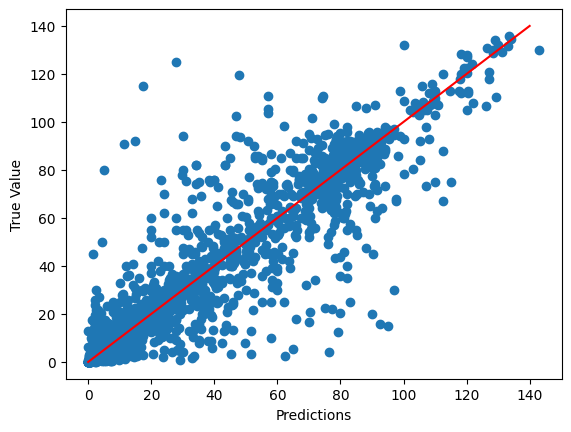

In [21]:
evaluate(y_test, preds_scaled)

### 2.2 Make a Classification Model

In [44]:
def to_class(x: float) -> str:
    if 0 <= x < 1.0:
        return "VeryLow"
    elif 1 <= x < 5.0:
        return "Low"
    elif 5 <= x < 20.0:
        return "Medium"
    elif 20 <= x < 100.0:
        return "High"
    elif x >= 100:
        return "VeryHigh"
    return None

In [116]:
y_train_class = y_train.apply(lambda x: to_class(x))
y_test_class = y_test.apply(lambda x: to_class(x))

In [45]:
def cat_evaluate(y_test, preds):
    print("MCC =", matthews_corrcoef(y_test, preds))
    
    ConfusionMatrixDisplay(
        confusion_matrix(y_test, preds)
    ).plot()

#### Using Full Dataset

##### Naive Bayes

In [35]:
(X_train_scaled==0).sum()/np.prod(X_train_scaled.shape)

0.10465116279069768

In [34]:
(X_train.to_numpy()==0).sum()/np.prod(X_train.shape)

0.9521235999844443

In [46]:
nb = GaussianNB().fit(X_train, y_train_class)
nb_scaled = GaussianNB().fit(X_train_scaled, y_train_class)

In [47]:
preds = nb.predict(X_test)
preds_scaled = nb_scaled.predict(scaler.transform(X_test))

MCC = 0.20031503639073892


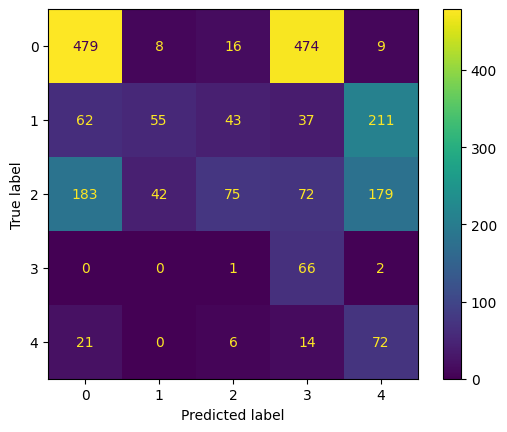

In [48]:
cat_evaluate(y_test_class, preds)

MCC = 0.19736193991130463


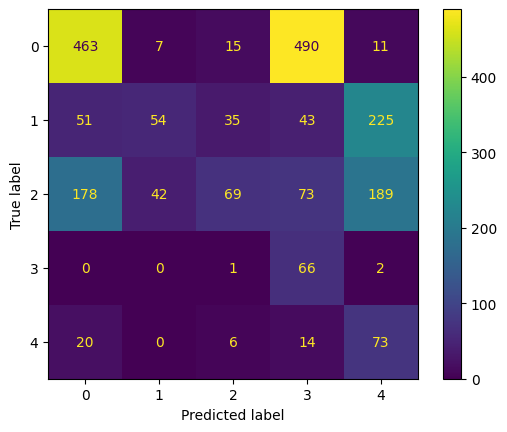

In [49]:
cat_evaluate(y_test_class, preds_scaled)

##### Decision Tree

In [86]:
dtc = DecisionTreeClassifier().fit(X_train, y_train_class)
dtc_scaled = DecisionTreeClassifier().fit(X_train_scaled, y_train_class)

In [87]:
preds = dtc.predict(X_test)
preds_scaled = dtc_scaled.predict(scaler.transform(X_test))

MCC = 0.7670971881247528


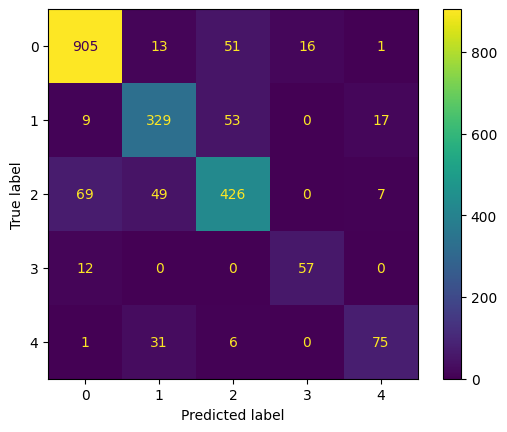

In [88]:
cat_evaluate(y_test_class, preds)

MCC = 0.7695116483918447


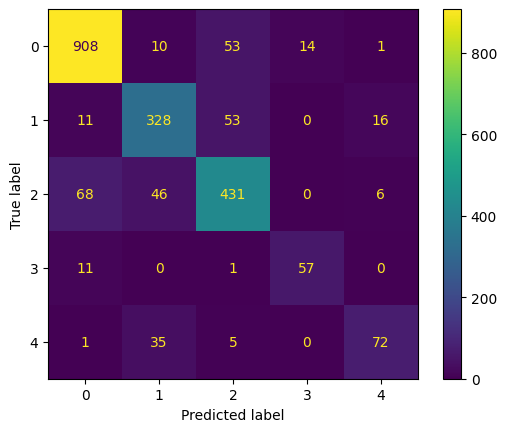

In [89]:
cat_evaluate(y_test_class, preds_scaled)

#### Using Projected Dataset

##### Naive Bayes

In [82]:
nb = Pipeline([
    ("reductor", PCA(n_components=0.9, svd_solver="full")),
    ("predictor", GaussianNB())
]).fit(X_train, y_train_class)
nb_scaled = Pipeline([
    ("reductor", PCA(n_components=0.9, svd_solver="full")),
    ("predictor", GaussianNB())
]).fit(X_train_scaled, y_train_class)

In [83]:
preds = nb.predict(X_test)
preds_scaled = nb_scaled.predict(scaler.transform(X_test))

MCC = 0.43681796116862837


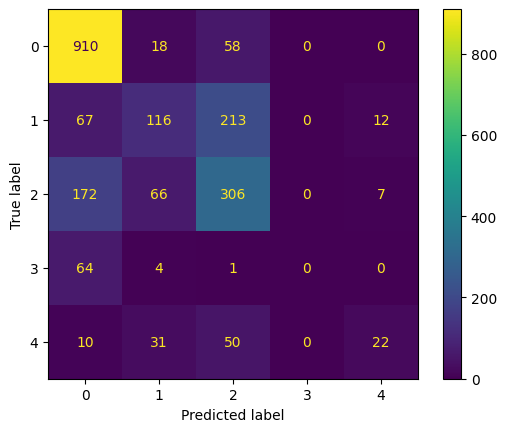

In [84]:
cat_evaluate(y_test_class, preds)

MCC = 0.46676141792511133


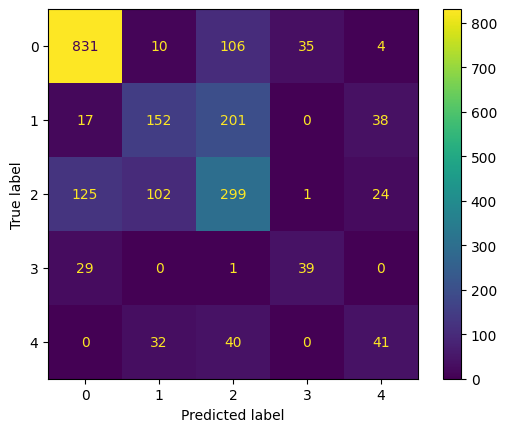

In [85]:
cat_evaluate(y_test_class, preds_scaled)

##### Decision Tree

In [90]:
dtc = Pipeline([
    ("reductor", PCA(n_components=0.9, svd_solver="full")),
    ("predictor", DecisionTreeClassifier())
]).fit(X_train, y_train_class)
dtc_scaled = Pipeline([
    ("reductor", PCA(n_components=0.9, svd_solver="full")),
    ("predictor", DecisionTreeClassifier())
]).fit(X_train_scaled, y_train_class)

In [91]:
preds = dtc.predict(X_test)
preds_scaled = dtc_scaled.predict(scaler.transform(X_test))

MCC = 0.6807797544127574


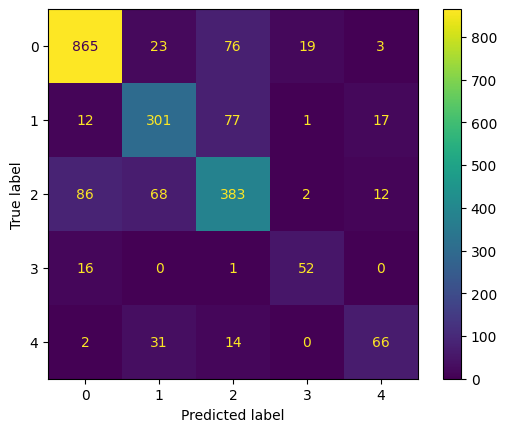

In [92]:
cat_evaluate(y_test_class, preds)

MCC = 0.7547508116617709


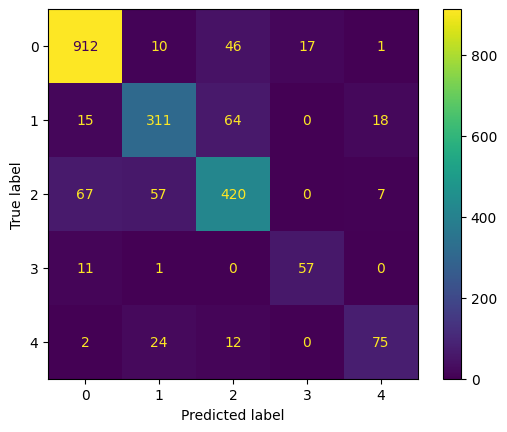

In [93]:
cat_evaluate(y_test_class, preds_scaled)

# Using SVD in the *unique_m.csv" Dataset

In [2]:
df = pd.read_csv("unique_m.csv")
df.shape

(21263, 88)

In [3]:
df.head()

H  He   Li   Be    B    C    N    O    F  Ne  ...   Au   Hg   Tl   Pb  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
1  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
2  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
3  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
4  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   

    Bi  Po  At  Rn  critical_temp                material  
0  0.0   0   0   0           29.0         Ba0.2La1.8Cu1O4  
1  0.0   0   0   0           26.0  Ba0.1La1.9Ag0.1Cu0.9O4  
2  0.0   0   0   0           19.0         Ba0.1La1.9Cu1O4  
3  0.0   0   0   0           22.0       Ba0.15La1.85Cu1O4  
4  0.0   0   0   0           23.0         Ba0.3La1.7Cu1O4  

[5 rows x 88 columns]

In [4]:
X = df.drop(columns=["critical_temp", "material"])
y = df.critical_temp

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

## Objective 1 - Dimensionality Reduction

In [6]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [38]:
def get_decomposition(x):
    s = np.linalg.svd(x, compute_uv=False)
    norm_s = (s**2)/(s**2).sum()
    N = (np.cumsum(norm_s)<0.9).sum()

    u,s,v = svds( csr_matrix(x), k=N+1 )
    return u,s,v

In [18]:
u,s,v = get_decomposition(X_train)
u_scaled, s_scaled, v_scaled = get_decomposition(X_train_scaled)

In [19]:
u.shape[1], u_scaled.shape[1]

(16, 59)

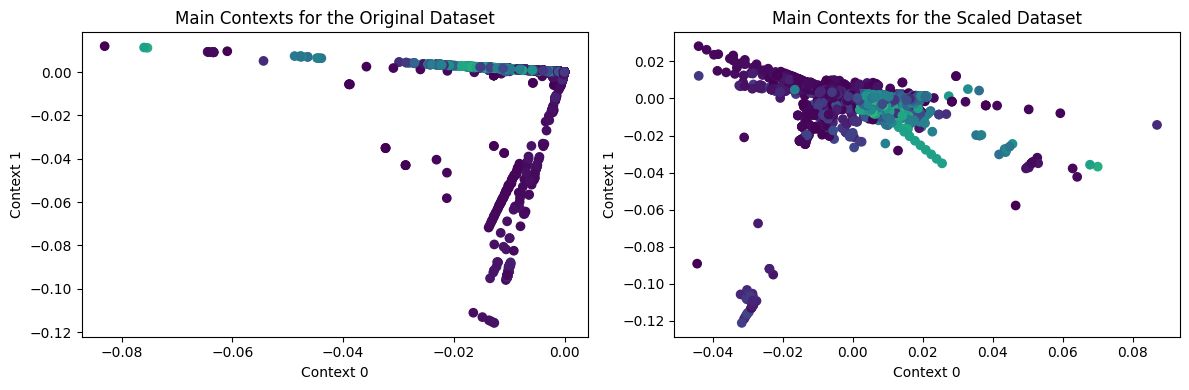

In [27]:
f, ax = plt.subplots(1,2, figsize=(12,4))

plot(u[:,-1], u[:, -2], y_train, ax[0], "Context 0", "Context 1", "Main Contexts for the Original Dataset")
plot(u_scaled[:, -1], u_scaled[:, -2], y_train, ax[1], "Context 0", "Context 1", "Main Contexts for the Scaled Dataset")
f.tight_layout()

- If the data is scaled, the number of contexts to represent 90% of the data is -----> **59**
- If the data is not scaled, the number of contexts to represent 90% of the data is --> **16**

## Objective 2 - Make a Regression and a Classification Model

### 2.1. Make a regression model

##### Using Full DataSet

In [20]:
dtr = DecisionTreeRegressor().fit(X_train, y_train)
dtr_scaled = DecisionTreeRegressor().fit(X_train_scaled, y_train)

In [28]:
preds = dtr.predict(X_test)
preds_scaled = dtr_scaled.predict(scaler.transform(X_test))

RMSE = 11.263349999483195
Max. Error = 84.0


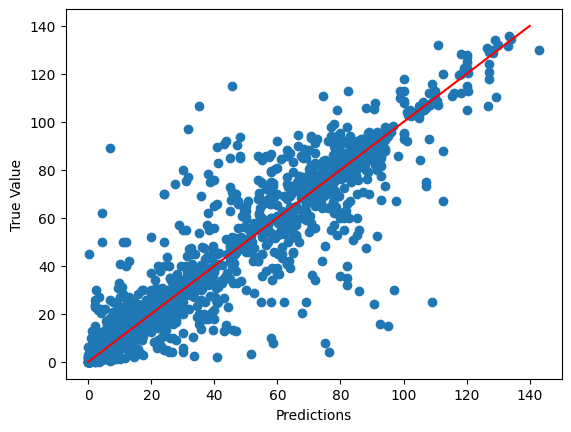

In [29]:
evaluate(y_test, preds)

RMSE = 11.376989171172655
Max. Error = 105.5


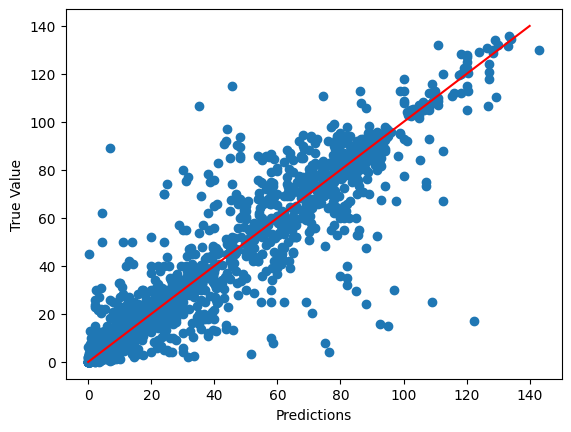

In [30]:
evaluate(y_test, preds_scaled)

#### Using Projected DataSet


In [39]:
dtr = DecisionTreeRegressor().fit(u @ np.diag(s) @ v, y_train)
dtr_scaled = DecisionTreeRegressor().fit(u_scaled @ np.diag(s_scaled) @ v_scaled, y_train)

In [40]:
preds = dtr.predict( X_test.to_numpy() )
preds_scaled = dtr_scaled.predict( scaler.transform(X_test) )

RMSE = 32.604875806368455
Max. Error = 113.5


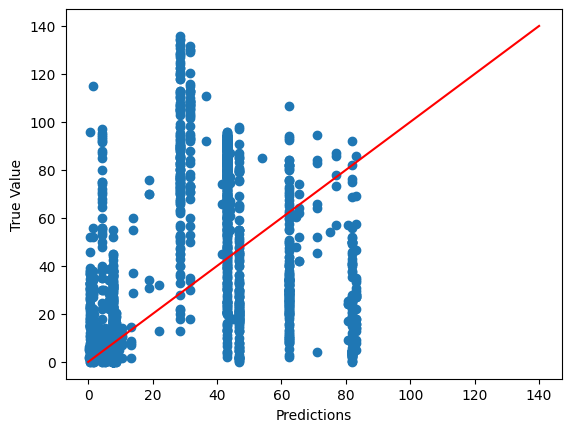

In [41]:
evaluate(y_test, preds)

RMSE = 33.417166946379595
Max. Error = 126.10000000000001


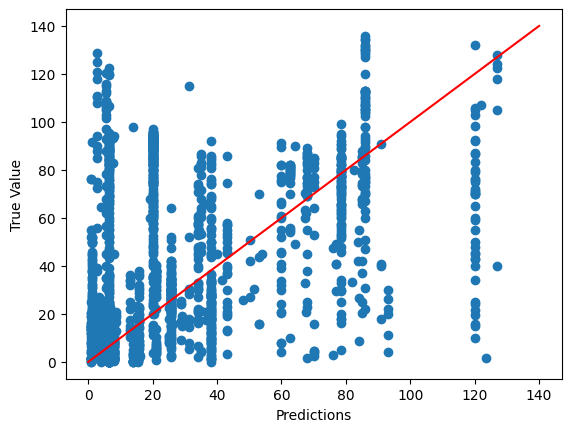

In [42]:
evaluate(y_test, preds_scaled)

### 2.2. Make a classification model

#### Using Full Dataset

##### Naive Bayes

In [43]:
nb = GaussianNB().fit(X_train, y_train_class)
nb_scaled = GaussianNB().fit(X_train_scaled, y_train_class)

NameError: name 'y_train_class' is not defined

In [199]:
preds = nb.predict(X_test)
preds_scaled = nb_scaled.predict(scaler.transform(X_test))

MCC = 0.20031503639073892


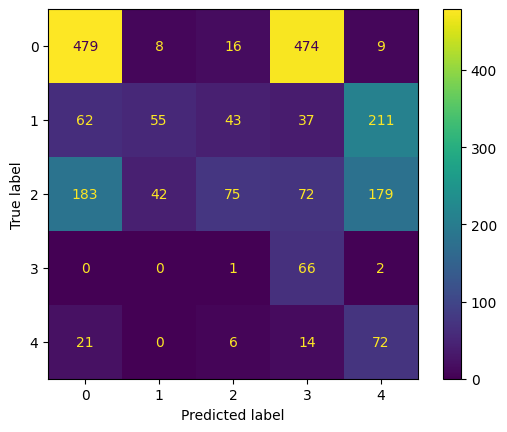

In [200]:
cat_evaluate(y_test_class, preds)

MCC = 0.19736193991130463


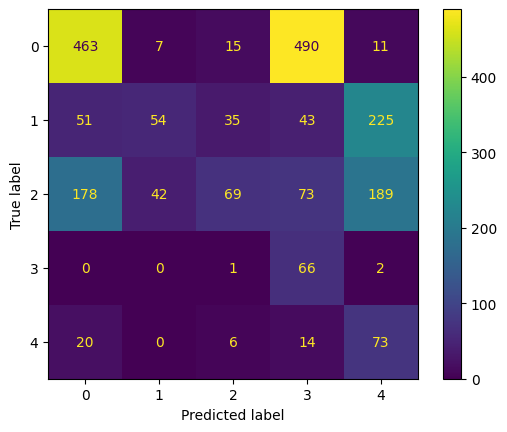

In [193]:
cat_evaluate(y_test_class, preds_scaled)

##### Decision Tree

In [201]:
dtc = DecisionTreeClassifier().fit(X_train, y_train_class)
dtc_scaled = DecisionTreeClassifier().fit(X_train_scaled, y_train_class)

In [202]:
preds = dtc.predict(X_test)
preds_scaled = dtc_scaled.predict(scaler.transform(X_test))

MCC = 0.7861577200569273


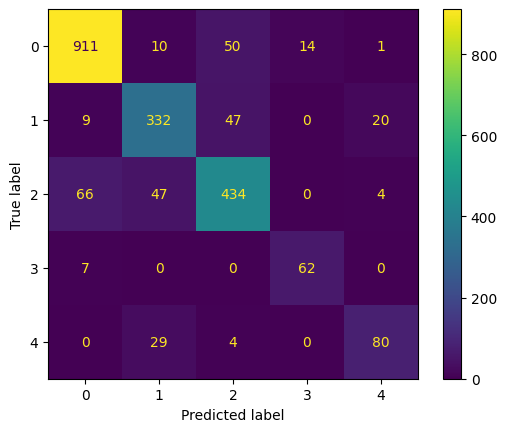

In [203]:
cat_evaluate(y_test_class, preds)

MCC = 0.7862467275496705


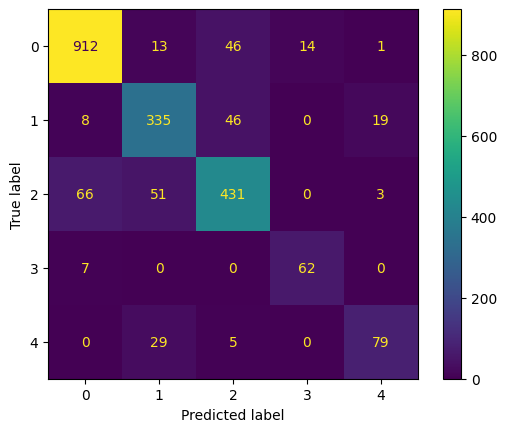

In [204]:
cat_evaluate(y_test_class, preds_scaled)

#### Using Projected Dataset

##### Naive Bayes

In [211]:
nb = GaussianNB().fit(u @ np.diag(s) @ v, y_train_class)
nb_scaled = GaussianNB().fit(u_scaled @ np.diag(s_scaled) @ v_scaled, y_train_class)

In [212]:
preds = nb.predict(X_test @ v.T @ np.diag(s) @ v)
preds_scaled = nb_scaled.predict(scaler.transform(X_test) @ v_scaled.T @ np.diag(s_scaled) @ v_scaled)

MCC = 0.17201264197756655


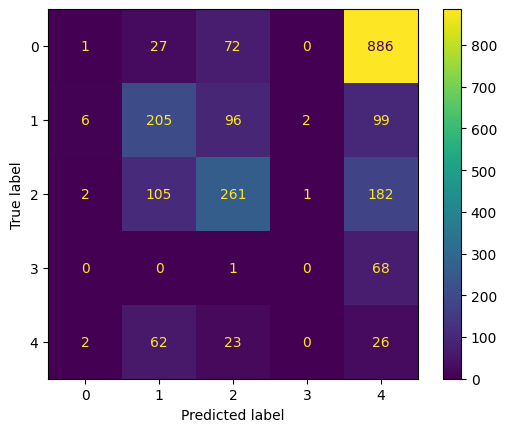

In [213]:
cat_evaluate(y_test_class, preds)

MCC = 0.1093671616705808


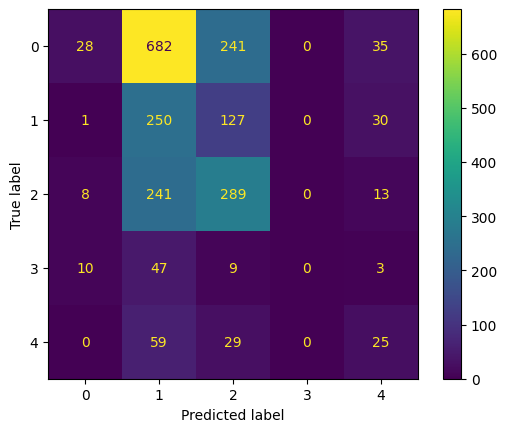

In [214]:
cat_evaluate(y_test_class, preds_scaled)

##### Decision Tree

In [219]:
dtc = DecisionTreeClassifier().fit(u, y_train_class)
dtc_scaled = DecisionTreeClassifier().fit(u_scaled, y_train_class)

In [220]:
preds = dtc.predict(X_test @ v.T)
preds_scaled = dtc_scaled.predict(scaler.transform(X_test) @ v_scaled.T )

MCC = 0.06015344985664099


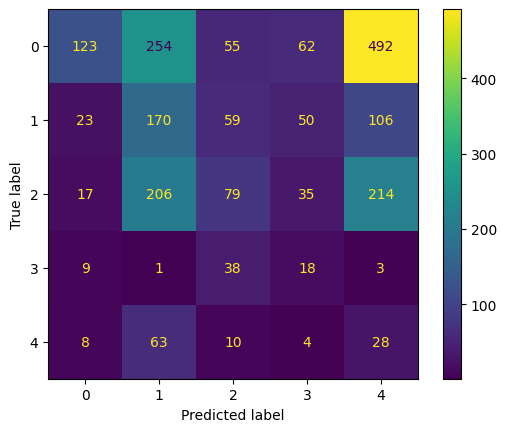

In [221]:
cat_evaluate(y_test_class, preds)

MCC = 0.05457258404255577


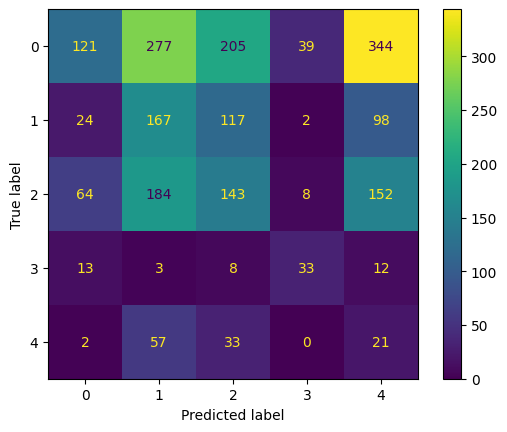

In [222]:
cat_evaluate(y_test_class, preds_scaled)

# Using Both Datasets

In [29]:
df = pd.read_csv("train.csv").merge(
    pd.read_csv("unique_m.csv"), 
    left_index=True, 
    right_index=True
)
df.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...   Au   Hg   Tl   Pb   Bi  Po  At  Rn  critical_temp_y  \
0        51.968828  ...  0.0  0.0  0.0  0.0  0.0   0   0   0             29.0   
1        47.094633  ...  0.0  0.0  0.0  0.0  0.0   0   0   0             26.0   
2        51.968828  ...  0.0  0.0  0.0  0.0  0.0   0   0   0             19.0   
3        51.968828  ...  0.0  0.0  0.0  0.0  0.0   0   0   0             22.0   
4        51.968828  ...  0.0  0.0  0.0  0.0  0.0   0   0   0             23.0   

                 material  
0         Ba0.2La1.8Cu1O4  
1  Ba0.1La1.9Ag0.1Cu0.9O4  
2         Ba0.1La1.9Cu1O4  
3       Ba0.15La1.85Cu1O4  
4         Ba0.3La1.7Cu1O4  

[5 rows x 170 columns]

In [30]:
(df.to_numpy()==0).sum() / np.prod(df.shape)

0.4864401293603083

In [31]:
X = df.drop(columns=["critical_temp_y", "critical_temp_x", "material"])
y = df.critical_temp_x

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)
enc = LabelEncoder().fit(y_train.apply(to_class))
y_train_class = enc.transform(y_train.apply(to_class))
y_test_class = enc.transform(y_test.apply(to_class))

## Objective 1 - Dimensionality Reduction

### PCA

In [33]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

pca = PCA(n_components=0.9, svd_solver="full").fit(X_train)
pca_scaled = PCA(n_components=0.9, svd_solver="full").fit(X_train_scaled)

len(pca.explained_variance_), len(pca_scaled.explained_variance_)

(2, 66)

- If the data is scaled, the number of components to represent 90% of the data is -----> **66**
- If the data is not scaled, the number of components to represent 90% of the data is --> **2**

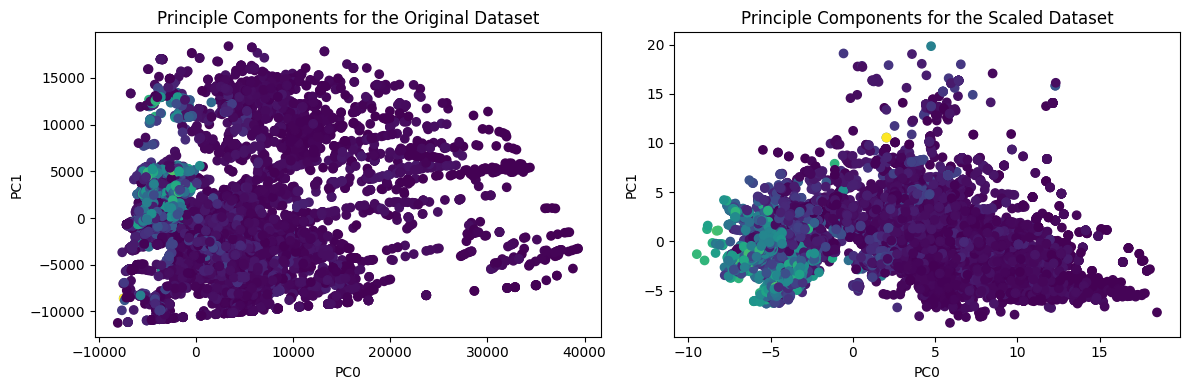

In [34]:
X_train_reduced = pca.transform(X_train)
X_train_scaled_reduced = pca_scaled.transform(X_train_scaled)

def plot(x, y, c, ax, xlabel="", ylabel="", title=""):
    ax.scatter(x,y,c=c)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
f, ax = plt.subplots(1,2, figsize=(12,4))

plot(X_train_reduced[:,0], X_train_reduced[:, 1], y_train, ax[0], "PC0", "PC1", "Principle Components for the Original Dataset")
plot(X_train_scaled_reduced[:,0], X_train_scaled_reduced[:, 1], y_train, ax[1], "PC0", "PC1", "Principle Components for the Scaled Dataset")
f.tight_layout()

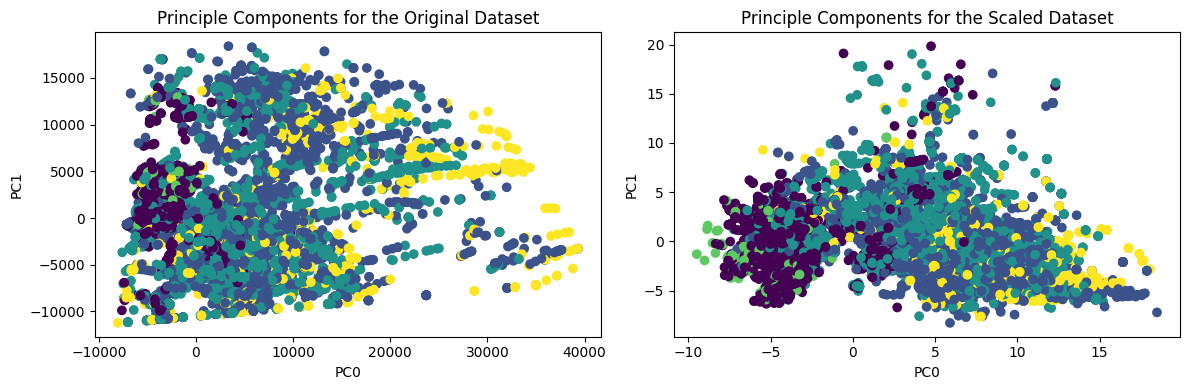

In [35]:
f, ax = plt.subplots(1,2, figsize=(12,4))

plot(X_train_reduced[:,0], X_train_reduced[:, 1], y_train_class, ax[0], "PC0", "PC1", "Principle Components for the Original Dataset")
plot(X_train_scaled_reduced[:,0], X_train_scaled_reduced[:, 1], y_train_class, ax[1], "PC0", "PC1", "Principle Components for the Scaled Dataset")
f.tight_layout()

### SVD

In [36]:
def get_decomposition(x):
    s = np.linalg.svd(x, compute_uv=False)
    norm_s = (s**2)/(s**2).sum()
    N = (np.cumsum(norm_s)<0.9).sum()
    
    u,s,v = svds( csr_matrix(x), k=N+1 )
    return u,s,v

In [37]:
def get_test_decomposition(x, s, v):
    u_test = x @ v.T
    return u_test @ np.diag(s) @ v

In [38]:
u,s,v = get_decomposition(X_train)
u_scaled, s_scaled, v_scaled = get_decomposition(X_train_scaled)

In [39]:
u.shape[1], u_scaled.shape[1] 

(2, 66)

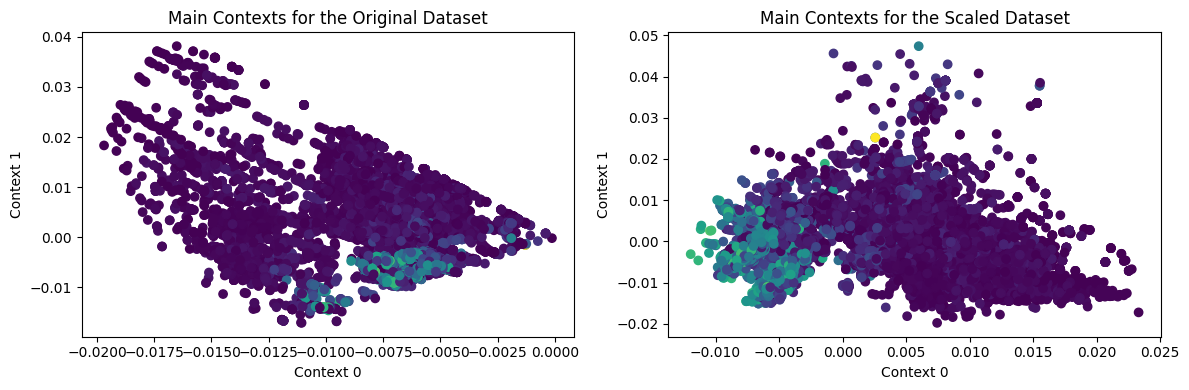

In [40]:
f, ax = plt.subplots(1,2, figsize=(12,4))

plot(u[:,-1], u[:, -2], y_train, ax[0], "Context 0", "Context 1", "Main Contexts for the Original Dataset")
plot(u_scaled[:, -1], u_scaled[:, -2], y_train, ax[1], "Context 0", "Context 1", "Main Contexts for the Scaled Dataset")
f.tight_layout()

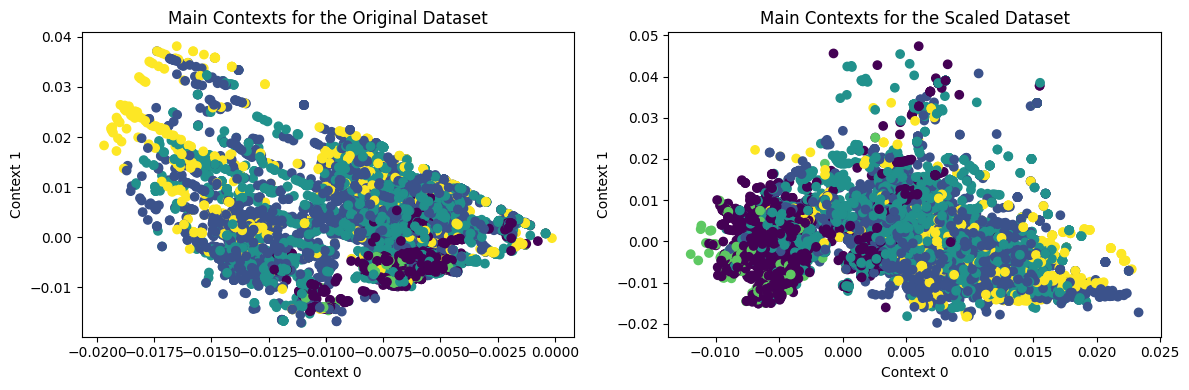

In [41]:
f, ax = plt.subplots(1,2, figsize=(12,4))

plot(u[:,-1], u[:, -2], y_train_class, ax[0], "Context 0", "Context 1", "Main Contexts for the Original Dataset")
plot(u_scaled[:, -1], u_scaled[:, -2], y_train_class, ax[1], "Context 0", "Context 1", "Main Contexts for the Scaled Dataset")
f.tight_layout()

## Objective 2 - Create a Regression and Classification model

### 2.1. Make a regression model

#### PCA

RMSE = 12.869083008674785
Max. Error = 119.62


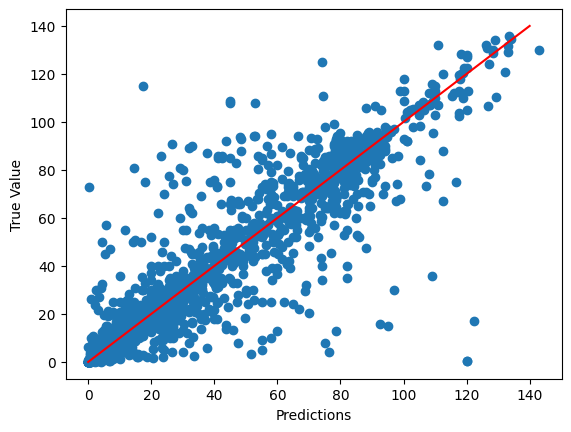

In [111]:
dtr = DecisionTreeRegressor().fit(X_train, y_train)
dtr_scaled = DecisionTreeRegressor().fit(X_train_scaled, y_train)

preds = dtr.predict(X_test)
preds_scaled = dtr_scaled.predict(scaler.transform(X_test))

evaluate(y_test, preds)

RMSE = 12.16514376445823
Max. Error = 105.5


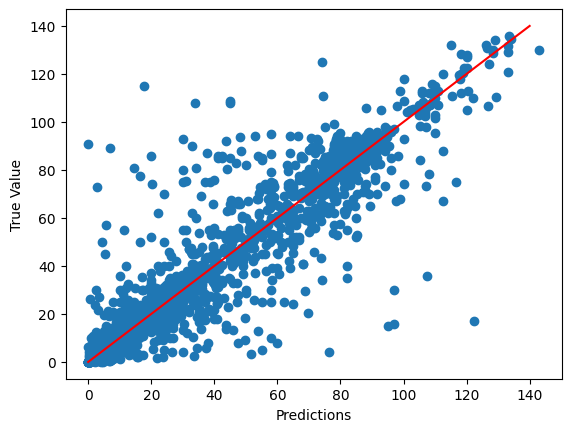

In [112]:
evaluate(y_test, preds_scaled)

RMSE = 17.988808241891167
Max. Error = 117.44999999999999


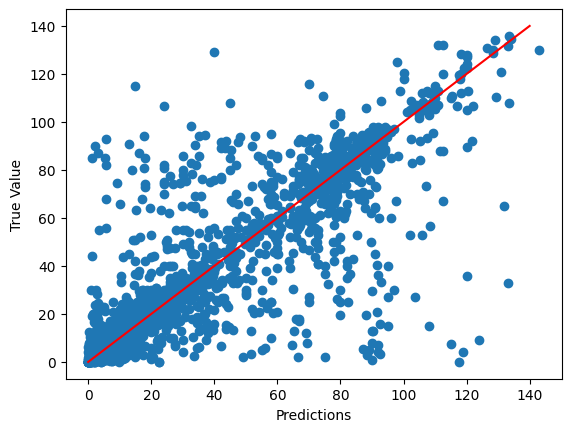

In [113]:
dtr = Pipeline([
    ("reducter", PCA(n_components=0.9, svd_solver="full")),
    ("predictor", DecisionTreeRegressor())
]).fit(X_train, y_train)
dtr_scaled = Pipeline([
    ("reducter", PCA(n_components=0.9, svd_solver="full")),
    ("predictor", DecisionTreeRegressor())
]).fit(X_train_scaled, y_train)

preds = dtr.predict(X_test)
preds_scaled = dtr_scaled.predict(scaler.transform(X_test))

evaluate(y_test, preds)

RMSE = 12.751917514940407
Max. Error = 129.8


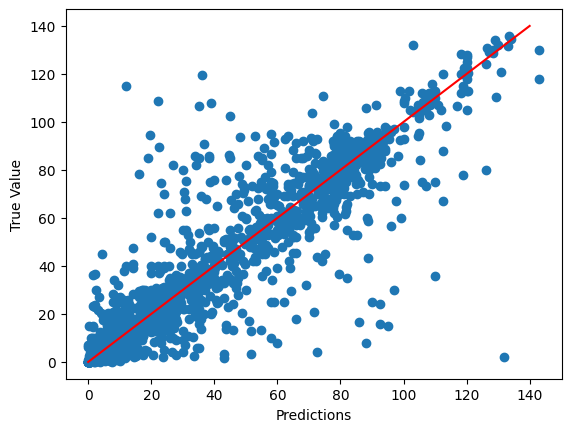

In [114]:
evaluate(y_test, preds_scaled)

#### SVD

RMSE = 44.03078380141812
Max. Error = 129.8


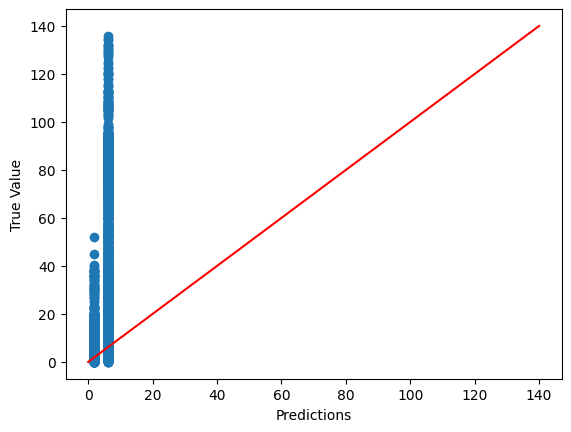

In [138]:
dtr = DecisionTreeRegressor().fit(u, y_train)
dtr_scaled = DecisionTreeRegressor().fit(u_scaled, y_train)

preds = dtr.predict( X_test @ v.T )
preds_scaled = dtr_scaled.predict(scaler.transform(X_test) @ v_scaled.T)

evaluate(y_test, preds)

RMSE = 36.961253148428206
Max. Error = 115.2


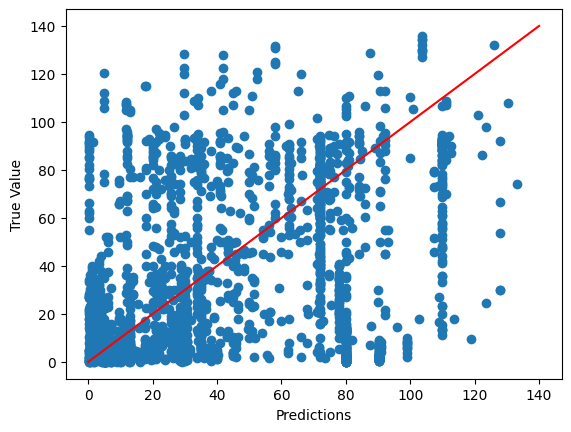

In [139]:
evaluate(y_test, preds_scaled)

### 2.2 Make a Classification Model

In [46]:
y_train_class = y_train.apply(lambda x: to_class(x))
y_test_class = y_test.apply(lambda x: to_class(x))

MCC = 0.20031503639073892


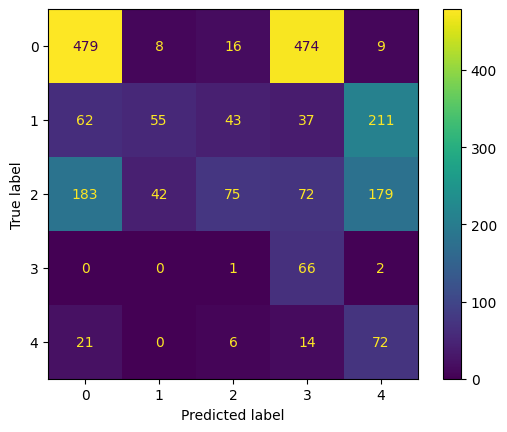

In [47]:
nb = GaussianNB().fit(X_train, y_train_class)
nb_scaled = GaussianNB().fit(X_train_scaled, y_train_class)

preds = nb.predict(X_test)
preds_scaled = nb_scaled.predict(scaler.transform(X_test))

cat_evaluate(y_test_class, preds)

MCC = 0.19736193991130463


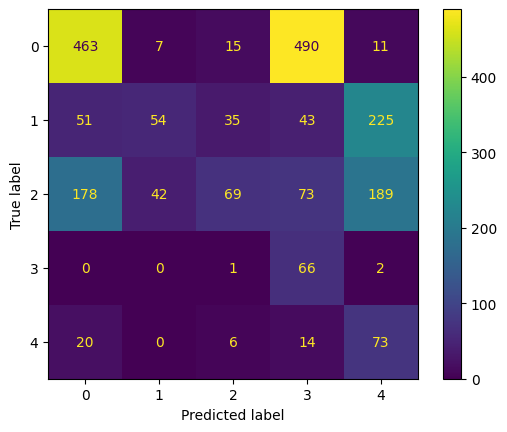

In [48]:
cat_evaluate(y_test_class, preds_scaled)

MCC = 0.7860622794173199


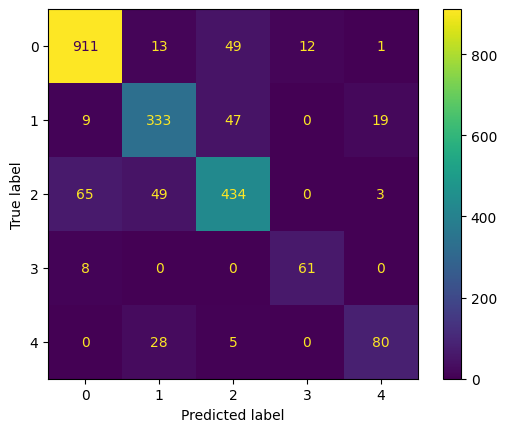

In [49]:
dtc = DecisionTreeClassifier().fit(X_train, y_train_class)
dtc_scaled = DecisionTreeClassifier().fit(X_train_scaled, y_train_class)

preds = dtc.predict(X_test)
preds_scaled = dtc_scaled.predict(scaler.transform(X_test))

cat_evaluate(y_test_class, preds)

MCC = 0.7903788079474123


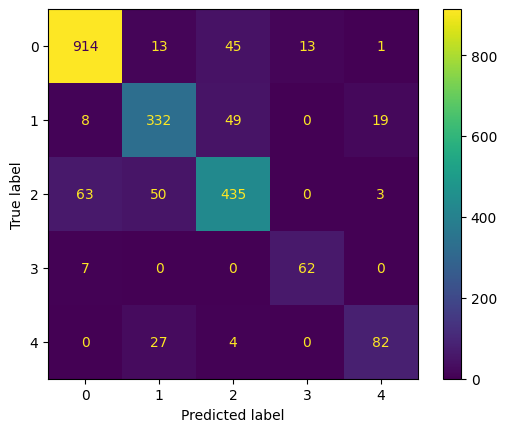

In [50]:
cat_evaluate(y_test_class, preds_scaled)

MCC = 0.026849760112869287


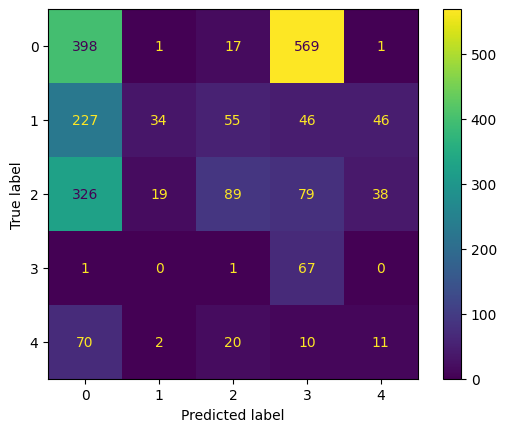

In [51]:
nb = Pipeline([
    ("reducter", PCA(n_components=0.9, svd_solver="full")),
    ("predictor", GaussianNB())
]).fit(X_train, y_train_class)
nb_scaled = Pipeline([
    ("reducter", PCA(n_components=0.9, svd_solver="full")),
    ("predictor", GaussianNB())
]).fit(X_train_scaled, y_train_class)

preds = nb.predict(X_test)
preds_scaled = nb_scaled.predict(scaler.transform(X_test))

cat_evaluate(y_test_class, preds)

MCC = 0.05378222268076511


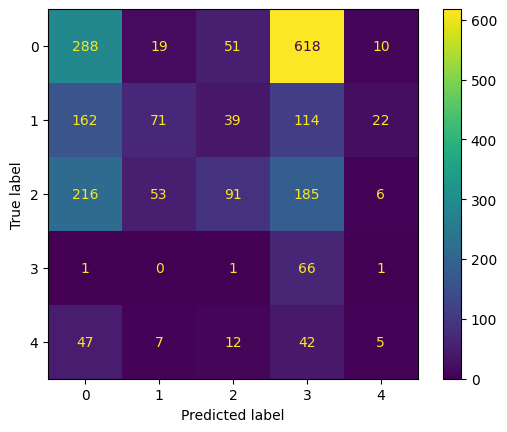

In [52]:
cat_evaluate(y_test_class, preds_scaled)

MCC = 0.7558380445600115


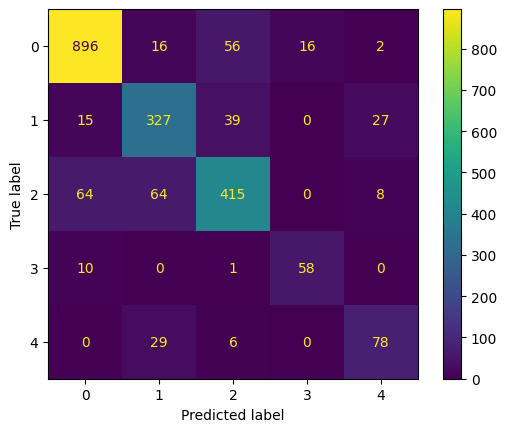

In [53]:
nb = Pipeline([
    ("reducter", PCA(n_components=0.9, svd_solver="full")),
    ("predictor", DecisionTreeClassifier())
]).fit(X_train, y_train_class)
nb_scaled = Pipeline([
    ("reducter", PCA(n_components=0.9, svd_solver="full")),
    ("predictor", DecisionTreeClassifier())
]).fit(X_train_scaled, y_train_class)

preds = nb.predict(X_test)
preds_scaled = nb_scaled.predict(scaler.transform(X_test))

cat_evaluate(y_test_class, preds)

MCC = 0.7437462527729126


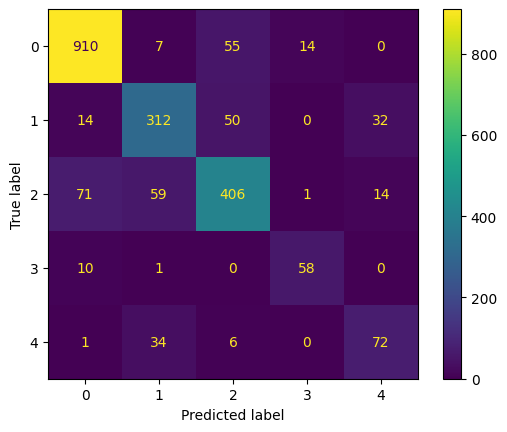

In [54]:
cat_evaluate(y_test_class, preds_scaled)

MCC = 0.12221132971025542


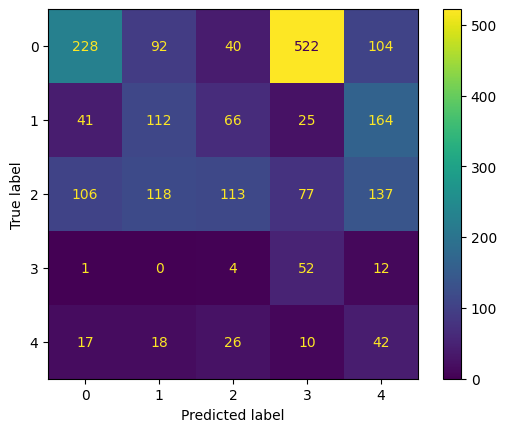

In [56]:
nb = GaussianNB().fit(u@np.diag(s)@v, y_train_class)
nb_scaled = GaussianNB().fit(u_scaled@np.diag(s_scaled)@v_scaled, y_train_class)

preds = nb.predict( X_test.to_numpy()  )
preds_scaled = nb_scaled.predict(scaler.transform(X_test))

cat_evaluate(y_test_class, preds)

MCC = 0.1382217850630171


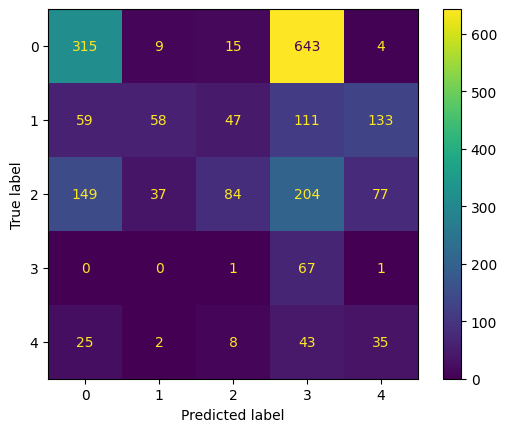

In [57]:
cat_evaluate(y_test_class, preds_scaled)

MCC = 0.12054724141113668


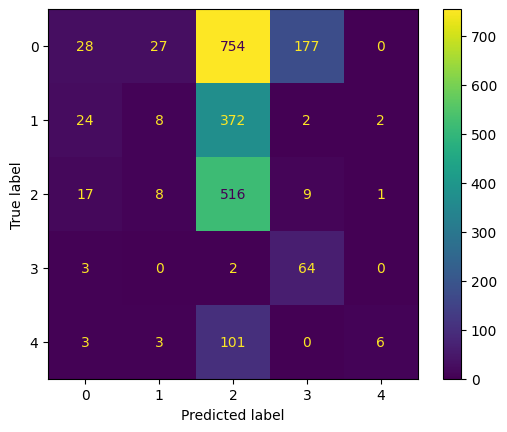

In [58]:
dtr = DecisionTreeClassifier().fit(u@np.diag(s)@v, y_train_class)
dtr_scaled = DecisionTreeClassifier().fit(u_scaled@np.diag(s_scaled)@v_scaled, y_train_class)

preds = dtr.predict( X_test.to_numpy() )
preds_scaled = dtr_scaled.predict(scaler.transform(X_test))

cat_evaluate(y_test_class, preds)

MCC = 0.3462639846954386


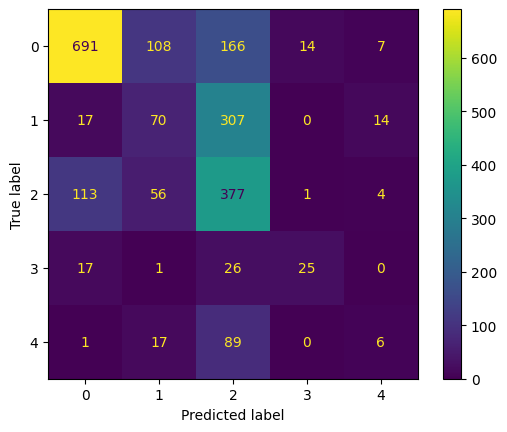

In [59]:
cat_evaluate(y_test_class, preds_scaled)

# Using SVD and PCA

## Objective 1

In [81]:
df = pd.read_csv("train.csv").merge(
    pd.read_csv("unique_m.csv"), 
    left_index=True, 
    right_index=True
)
df.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...   Au   Hg   Tl   Pb   Bi  Po  At  Rn  critical_temp_y  \
0        51.968828  ...  0.0  0.0  0.0  0.0  0.0   0   0   0             29.0   
1        47.094633  ...  0.0  0.0  0.0  0.0  0.0   0   0   0             26.0   
2        51.968828  ...  0.0  0.0  0.0  0.0  0.0   0   0   0             19.0   
3        51.968828  ...  0.0  0.0  0.0  0.0  0.0   0   0   0             22.0   
4        51.968828  ...  0.0  0.0  0.0  0.0  0.0   0   0   0             23.0   

                 material  
0         Ba0.2La1.8Cu1O4  
1  Ba0.1La1.9Ag0.1Cu0.9O4  
2         Ba0.1La1.9Cu1O4  
3       Ba0.15La1.85Cu1O4  
4         Ba0.3La1.7Cu1O4  

[5 rows x 170 columns]

In [82]:
def svd(X):
    s = np.linalg.svd(X, compute_uv=False)
    concept_ratio = (s**2)/(s**2).sum()
    N = s[np.cumsum(concept_ratio)<0.9].shape[0] + 1
    
    return svds(X, k=N)

In [83]:
u,s,v = svd(X_train.to_numpy())
X_train_svd=u@np.diag(s)@v

In [85]:
scaler = StandardScaler().fit(X_train)
scaler_svd = StandardScaler().fit(X_train_svd)

X_train_std = scaler.transform(X_train)
X_train_svd_std = scaler_svd.transform(X_train_svd)

In [86]:
u.shape,s.shape,v.shape

((19136, 16), (16,), (16, 86))

In [99]:
pca = PCA(n_components=0.9, svd_solver="full").fit(X_train)
pca_svd = PCA(n_components=0.9, svd_solver="full").fit(X_train_svd)
pca_std = PCA(n_components=0.9, svd_solver="full").fit(X_train_std)
pca_svd_std = PCA(n_components=0.9, svd_solver="full").fit(X_train_svd_std)


In [88]:
len(pca.explained_variance_), len(pca_svd.explained_variance_), len(pca_std.explained_variance_), len(pca_Std_svd.explained_variance_)

(17, 10, 59, 11)

In [89]:
X_train_reduced = pca.transform(X_train)
X_train_svd_reduced = pca_svd.transform(X_train_svd)
X_train_std_reduced = pca_std.transform(X_train_std)
X_train_svd_std_reduced = pca_Std_svd.transform(X_train_svd_std)

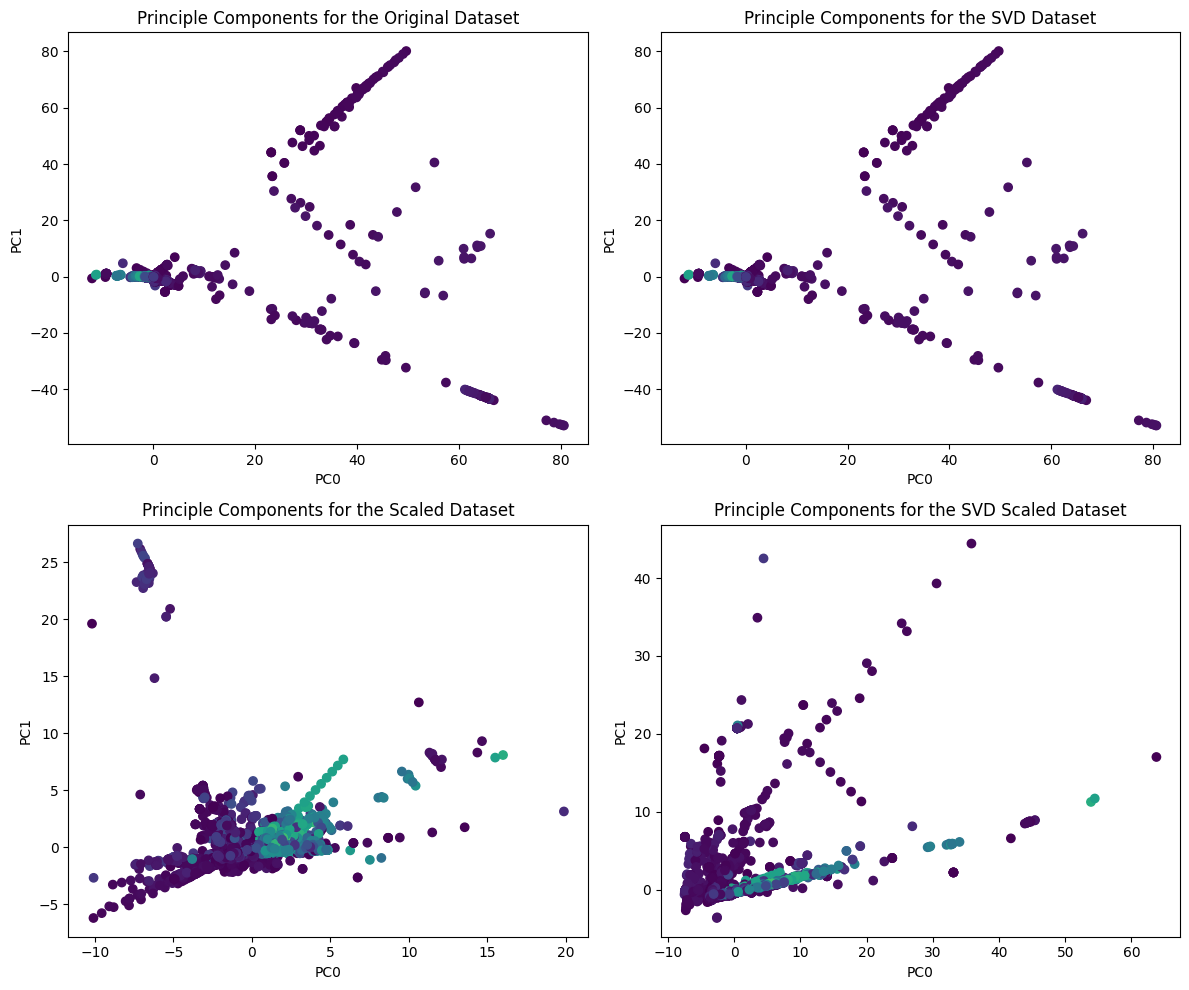

In [93]:
f, ax = plt.subplots(2,2, figsize=(12,10))

plot(X_train_reduced[:,0], X_train_reduced[:,1], y_train, ax[0,0], "PC0", "PC1", "Principle Components for the Original Dataset")
plot(X_train_svd_reduced[:,0], X_train_svd_reduced[:, 1], y_train, ax[0,1], "PC0", "PC1", "Principle Components for the SVD Dataset")
plot(X_train_std_reduced[:,0], X_train_std_reduced[:, 1], y_train, ax[1,0], "PC0", "PC1", "Principle Components for the Scaled Dataset")
plot(X_train_svd_std_reduced[:,0], X_train_svd_std_reduced[:, 1], y_train, ax[1,1], "PC0", "PC1", "Principle Components for the SVD Scaled Dataset")

f.tight_layout()

## Objective 2

### Regression Model

In [94]:
dtr = DecisionTreeRegressor().fit(X_train, y_train)
dtr_svd = DecisionTreeRegressor().fit(X_train_svd, y_train)
dtr_std = DecisionTreeRegressor().fit(X_train_std, y_train)
dtr_svd_std = DecisionTreeRegressor().fit(X_train_svd_std, y_train)

In [96]:
preds = dtr.predict(X_test)
preds_svd = dtr_svd.predict(X_test.to_numpy())
preds_std = dtr_std.predict(scaler.transform(X_test))
preds_svd_std = dtr_svd_std.predict(scaler_svd.transform(X_test.to_numpy()))

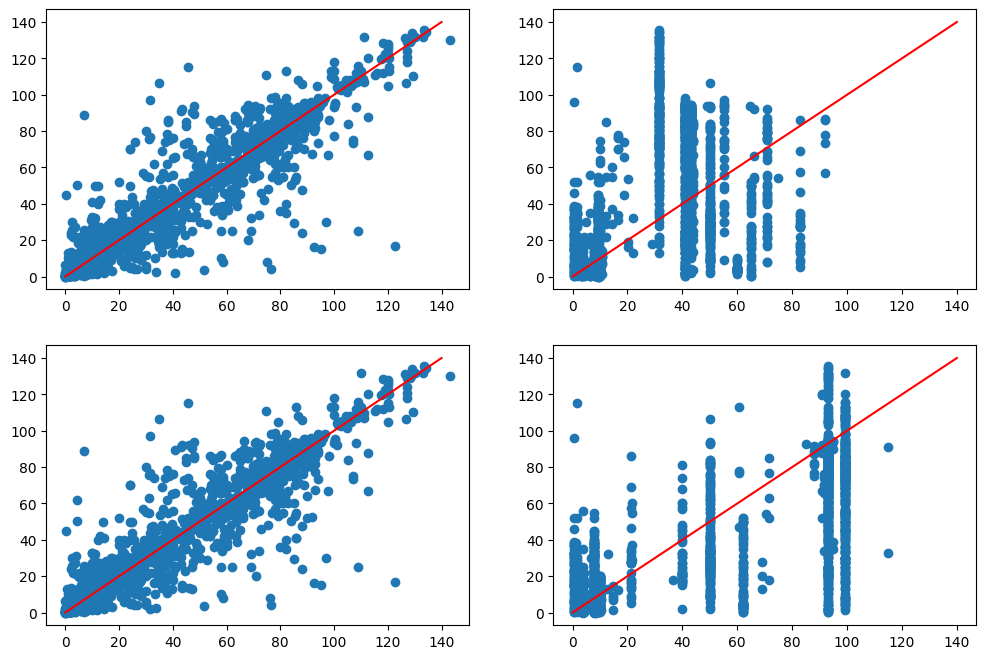

In [98]:
f,ax = plt.subplots(2,2, figsize=(12,8))

ax[0,0].scatter(preds, y_test)
ax[0,0].plot([0,140],[0,140], "r")

ax[0,1].scatter(preds_svd, y_test)
ax[0,1].plot([0,140],[0,140], "r")

ax[1,0].scatter(preds_std, y_test)
ax[1,0].plot([0,140],[0,140], "r")

ax[1,1].scatter(preds_svd_std, y_test)
ax[1,1].plot([0,140],[0,140], "r")

In [101]:
dtr = DecisionTreeRegressor().fit(pca.transform(X_train), y_train)
dtr_svd = DecisionTreeRegressor().fit(pca_svd.transform(X_test.to_numpy()), y_train)
dtr_std = DecisionTreeRegressor().fit(pca_std.transform(X_train_std), y_train)
dtr_svd_std = DecisionTreeRegressor().fit(pca_svd_std.transform(X_test.to_numpy()), y_train)

In [104]:
preds = dtr.predict(pca.transform(X_test))
preds_svd = dtr_svd.predict(
    pca_svd.transform(X_test.to_numpy())
)
preds_std = dtr_std.predict(
    pca_std.transform(X_test.to_numpy())
)
preds_svd_std = dtr_svd_std.predict(
    pca_svd_std.transform(
        scaler_svd.transform(X_test.to_numpy())
    )
)

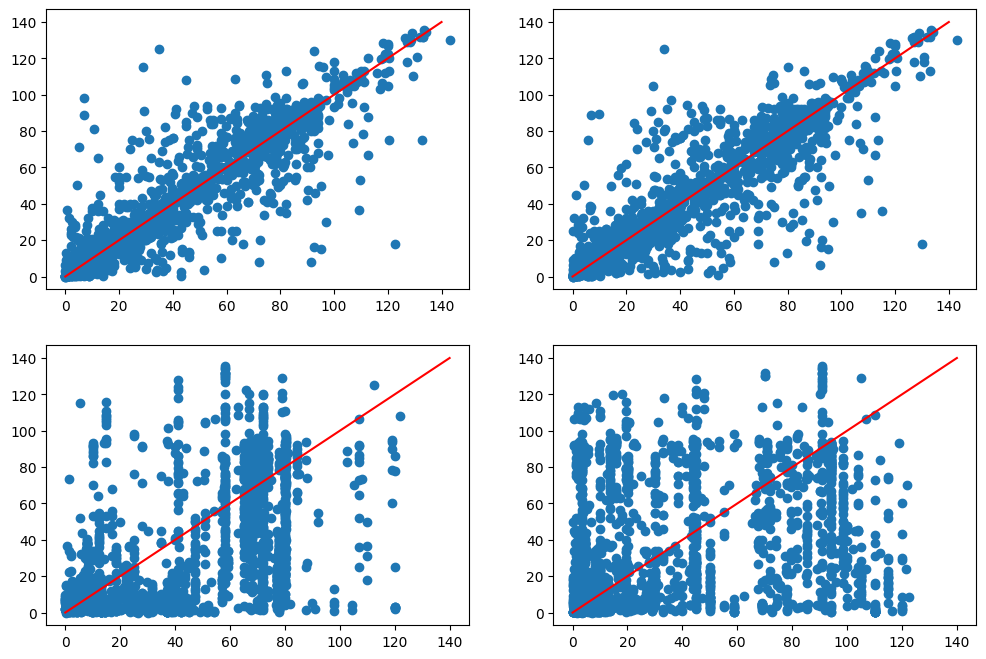

In [105]:
f,ax = plt.subplots(2,2, figsize=(12,8))

ax[0,0].scatter(preds, y_test)
ax[0,0].plot([0,140],[0,140], "r")

ax[0,1].scatter(preds_svd, y_test)
ax[0,1].plot([0,140],[0,140], "r")

ax[1,0].scatter(preds_std, y_test)
ax[1,0].plot([0,140],[0,140], "r")

ax[1,1].scatter(preds_svd_std, y_test)
ax[1,1].plot([0,140],[0,140], "r")

### Classification Model

#### Decision Tree

##### Full DataSet

In [106]:
dtr = DecisionTreeClassifier().fit(X_train, y_train_class)
dtr_svd = DecisionTreeClassifier().fit(X_train_svd, y_train_class)
dtr_std = DecisionTreeClassifier().fit(X_train_std, y_train_class)
dtr_svd_std = DecisionTreeClassifier().fit(X_train_svd_std, y_train_class)

In [107]:
preds = dtr.predict(X_test)
preds_svd = dtr_svd.predict(X_test.to_numpy())
preds_std = dtr_std.predict(scaler.transform(X_test))
preds_svd_std = dtr_svd_std.predict(scaler_svd.transform(X_test.to_numpy()))

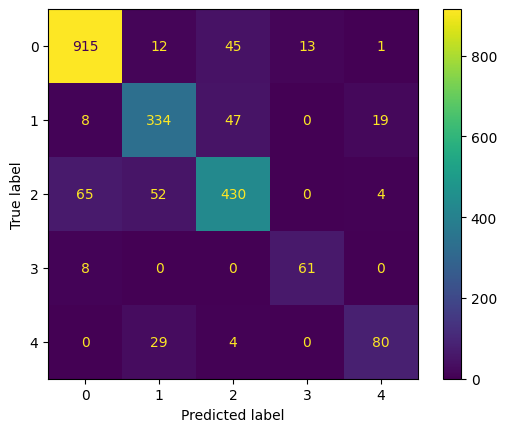

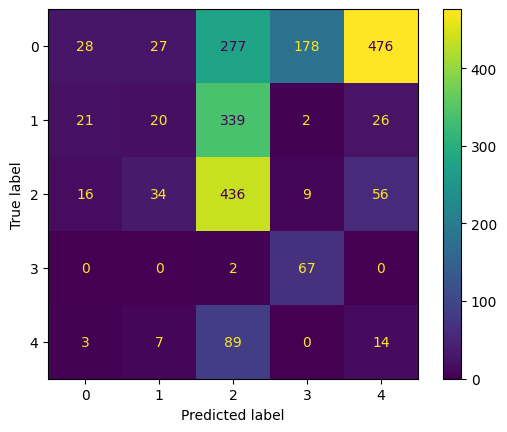

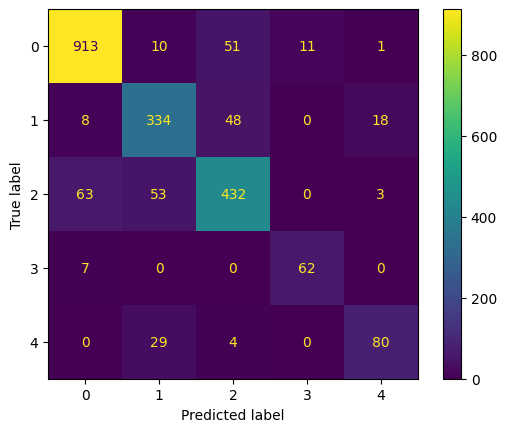

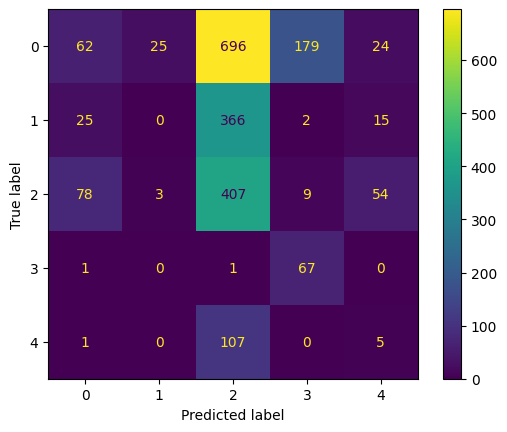

In [115]:
#f,ax = plt.subplots(2,2, figsize=(12,8))
ConfusionMatrixDisplay(
    confusion_matrix(y_test_class, preds)
).plot()

ConfusionMatrixDisplay(
    confusion_matrix(y_test_class, preds_svd)
).plot()

ConfusionMatrixDisplay(
    confusion_matrix(y_test_class, preds_std)
).plot()

ConfusionMatrixDisplay(
    confusion_matrix(y_test_class, preds_svd_std)
).plot()


##### Reduced Dataset

In [116]:
dtr = DecisionTreeClassifier().fit(pca.transform(X_train), y_train_class)
dtr_svd = DecisionTreeClassifier().fit(pca_svd.transform(X_train_svd), y_train_class)
dtr_std = DecisionTreeClassifier().fit(pca_std.transform(X_train_std), y_train_class)
dtr_svd_std = DecisionTreeClassifier().fit(pca_svd_std.transform(X_train_svd_std), y_train_class)

In [117]:
preds = dtr.predict( pca.transform(X_test) )
preds_svd = dtr_svd.predict( pca_svd.transform(X_test.to_numpy()) )
preds_std = dtr_std.predict( pca_std.transform(scaler.transform(X_test)))
preds_svd_std = dtr_svd_std.predict( pca_svd_std.transform( scaler_svd.transform(X_test.to_numpy())) )

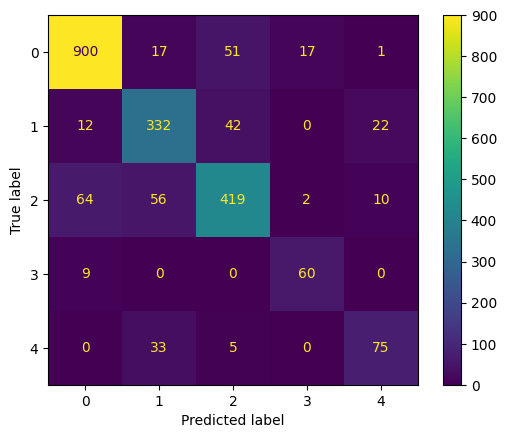

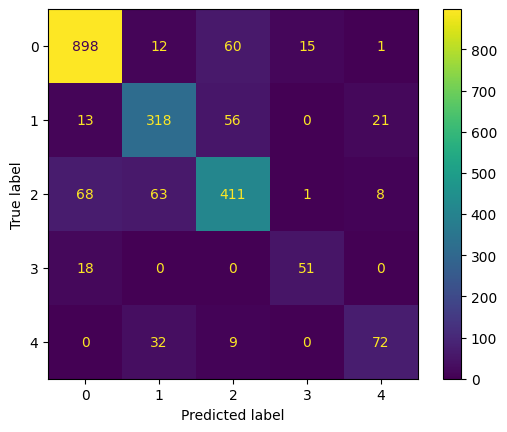

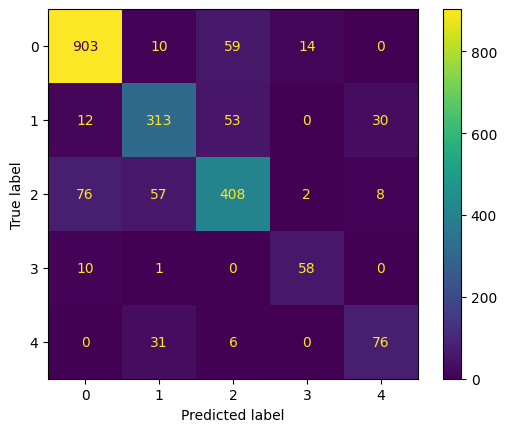

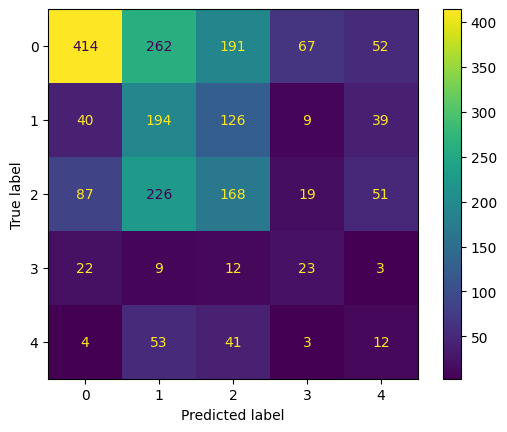

In [118]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test_class, preds)
).plot()

ConfusionMatrixDisplay(
    confusion_matrix(y_test_class, preds_svd)
).plot()

ConfusionMatrixDisplay(
    confusion_matrix(y_test_class, preds_std)
).plot()

ConfusionMatrixDisplay(
    confusion_matrix(y_test_class, preds_svd_std)
).plot()

#### Naive Bayes

##### Full Dataset

In [119]:
nb = GaussianNB().fit(X_train, y_train_class)
nb_svd = GaussianNB().fit(X_train_svd, y_train_class)
nb_std = GaussianNB().fit(X_train_std, y_train_class)
nb_svd_std = GaussianNB().fit(X_train_svd_std, y_train_class)

In [120]:
preds = nb.predict(X_test)
preds_svd = nb_svd.predict(X_test.to_numpy())
preds_std = nb_std.predict(scaler.transform(X_test))
preds_svd_std = nb_svd_std.predict(scaler_svd.transform(X_test.to_numpy()))

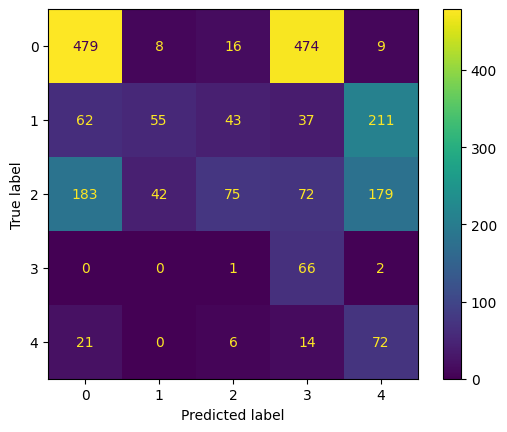

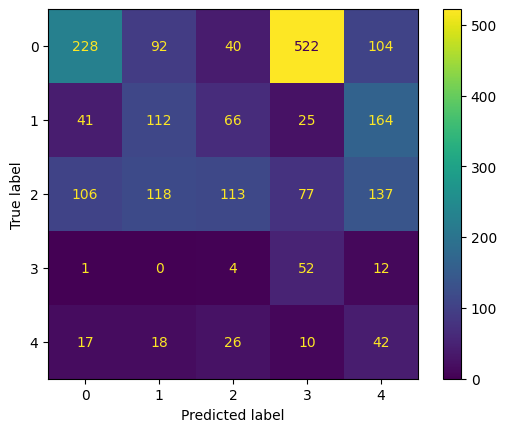

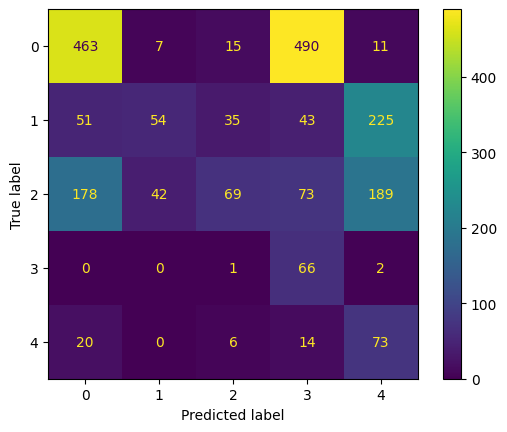

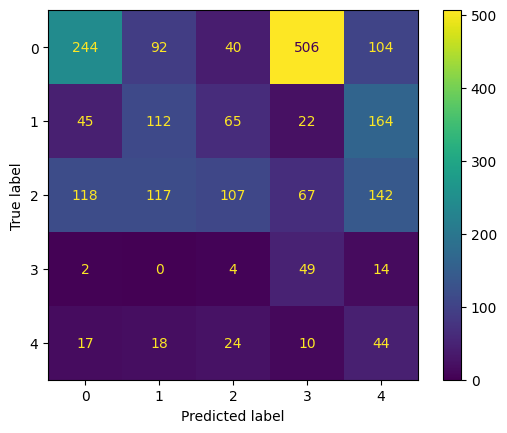

In [121]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test_class, preds)
).plot()

ConfusionMatrixDisplay(
    confusion_matrix(y_test_class, preds_svd)
).plot()

ConfusionMatrixDisplay(
    confusion_matrix(y_test_class, preds_std)
).plot()

ConfusionMatrixDisplay(
    confusion_matrix(y_test_class, preds_svd_std)
).plot()

##### Reduced Dataset

In [122]:
nb = GaussianNB().fit(pca.transform(X_train), y_train_class)
nb_svd = GaussianNB().fit(pca_svd.transform(X_train_svd), y_train_class)
nb_std = GaussianNB().fit(pca_std.transform(X_train_std), y_train_class)
nb_svd_std = GaussianNB().fit(pca_svd_std.transform(X_train_svd_std), y_train_class)

In [125]:
preds = nb.predict( pca.transform(X_test) )
preds_svd = nb_svd.predict( pca_svd.transform(X_test.to_numpy()) )
preds_std = nb_std.predict( pca_std.transform(scaler.transform(X_test)))
preds_svd_std = nb_svd_std.predict( pca_svd_std.transform( scaler_svd.transform(X_test.to_numpy())) )

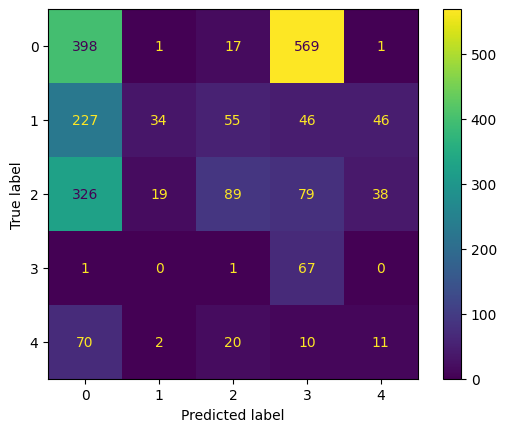

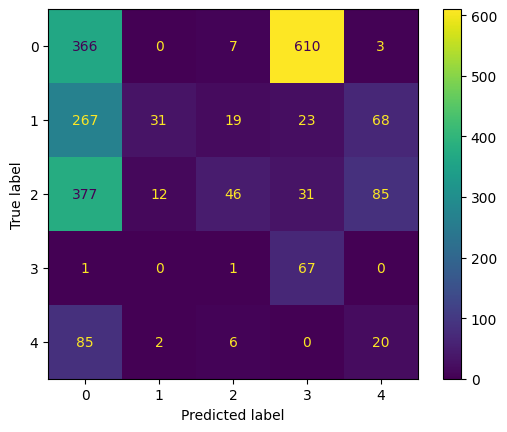

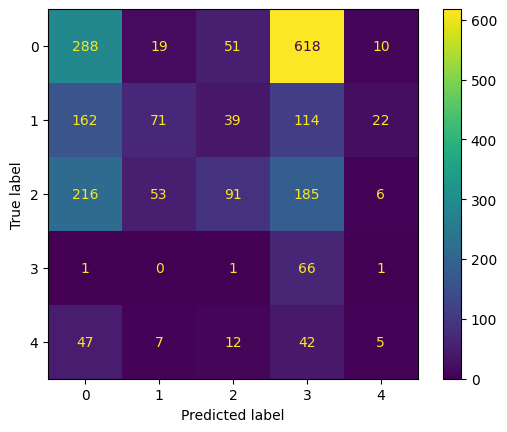

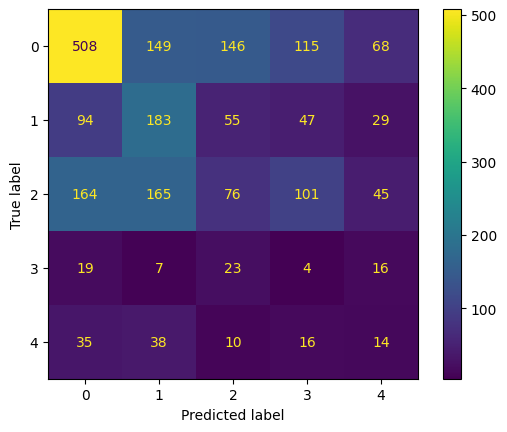

In [126]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test_class, preds)
).plot()

ConfusionMatrixDisplay(
    confusion_matrix(y_test_class, preds_svd)
).plot()

ConfusionMatrixDisplay(
    confusion_matrix(y_test_class, preds_std)
).plot()

ConfusionMatrixDisplay(
    confusion_matrix(y_test_class, preds_svd_std)
).plot()